In [12]:
import dataset_utils as dataset

from Keras import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from dataset_utils import arange_datasets, train_val_kfold

In [13]:
dev_data = dataset.load_dataset("../data/ML-CUP23-TR.csv")
blind_data = dataset.load_dataset("../data/ML-CUP23-TS.csv")

In [14]:

seed = 108
# split the two dataset into inputs and labels, scale them, then kfold the devset for grid search
X, y, X_blind = arange_datasets(dev_data, blind_data)

# train-val-test split on devset
X_dev, X_test, y_dev, y_test = train_test_split(X, y, train_size=0.85, random_state=seed, shuffle=True)
train_folds, val_folds = train_val_kfold(X_dev, y_dev, folds=5, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.3, random_state=seed, shuffle=True)

# Keras

In [15]:
parameters = [
    {'optimizer': 'SGD', 'learning_rate': [0.005, 0.001, 0.0005],
     'weight_decay': [0.0, 0.001, 0.0005, 0.0001, 0.00001],
     'momentum': [0.9, 0.85, 0.75], 'nesterov': [True, False]}
]

In [16]:
grid = True

In [ ]:
if grid:
    layer_configuration = [
        ('dense', 150),
        ('dense', 150),
        ('dense', 150),
        ('dense', 150)
    ]
    print(f"Layer configuration: {layer_configuration}")
    best_keras_params, res_values = keras_grid_search(model_builder=keras_mlp, parameters=parameters,
                                                      model_layers=layer_configuration,
                                                      train_data=train_folds, val_data=val_folds,
                                                      verbose=0, max_epochs= 200)
    print(f"Best combo: {best_keras_params}, with values: {res_values}")

Layer configuration: [('dense', 150), ('dense', 150), ('dense', 150), ('dense', 150)]
New best parameters: {'learning_rate': 0.005, 'weight_decay': 0.0, 'momentum': 0.9, 'nesterov': True}, Train Loss: 0.06501824446022511, Val Loss: 3.0937533140182496
New best parameters: {'learning_rate': 0.005, 'weight_decay': 0.0, 'momentum': 0.9, 'nesterov': False}, Train Loss: 0.035835371166467664, Val Loss: 1.4642928123474122
New best parameters: {'learning_rate': 0.005, 'weight_decay': 0.0, 'momentum': 0.85, 'nesterov': True}, Train Loss: 0.02307819090783596, Val Loss: 0.4386038899421692


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 300)               3300      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 3)                 903       
                                                                 
Total params: 275103 (1.05 MB)
Trainable params: 275103 (1.05

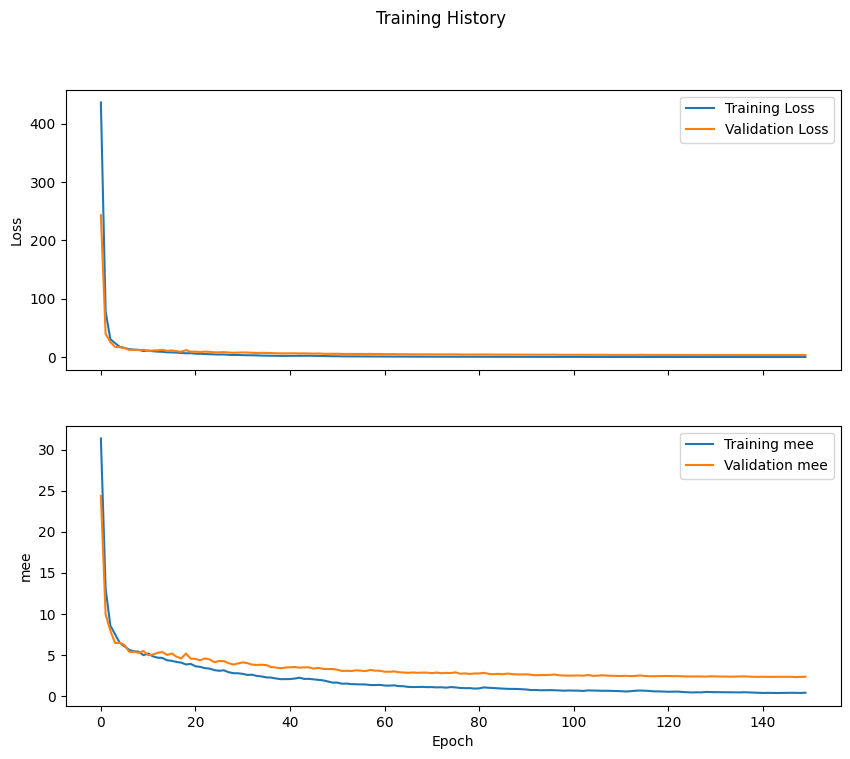

In [7]:
#Best parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'momentum': 0.9, 'nesterov': True, 'optimizer': 'SGD'}, with values: (18.03679656982422, 18.47313709259033)
model_to_test = keras_mlp([
    ('dense', 300),
    ('dense', 300),
    ('dense', 300),
    ('dense', 300)
])
model_to_test.summary()
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, cooldown=20, verbose=1,
                      factor=0.25,
                      min_lr=1e-7,
                      min_delta=1e-7)
]
history = keras_train(model_to_test, train_data=(X_train, y_train), val_data=(X_val, y_val), epochs=150,
                      optimizer=k.optimizers.SGD(learning_rate=0.005, momentum=0.9, weight_decay=0.001, nesterov=True),
                      callback=callbacks)
plot_keras_history(history)

Epoch 1/150
19/19 [==============================] - 1s 13ms/step - loss: 258.2604 - mee: 22.6838 - val_loss: 98.6800 - val_mee: 16.0419 - lr: 0.0100
Epoch 2/150
19/19 [==============================] - 0s 6ms/step - loss: 79.9523 - mee: 14.1351 - val_loss: 61.9500 - val_mee: 12.5115 - lr: 0.0100
Epoch 3/150
19/19 [==============================] - 0s 6ms/step - loss: 60.7932 - mee: 12.4250 - val_loss: 49.9958 - val_mee: 11.2772 - lr: 0.0100
Epoch 4/150
19/19 [==============================] - 0s 5ms/step - loss: 52.6092 - mee: 11.5855 - val_loss: 47.9064 - val_mee: 11.0893 - lr: 0.0100
Epoch 5/150
19/19 [==============================] - 0s 5ms/step - loss: 44.2845 - mee: 10.6257 - val_loss: 42.8584 - val_mee: 10.3148 - lr: 0.0100
Epoch 6/150
19/19 [==============================] - 0s 5ms/step - loss: 49.2224 - mee: 11.1431 - val_loss: 40.2945 - val_mee: 9.9414 - lr: 0.0100
Epoch 7/150
19/19 [==============================] - 0s 5ms/step - loss: 35.9155 - mee: 9.4672 - val_loss: 36.7

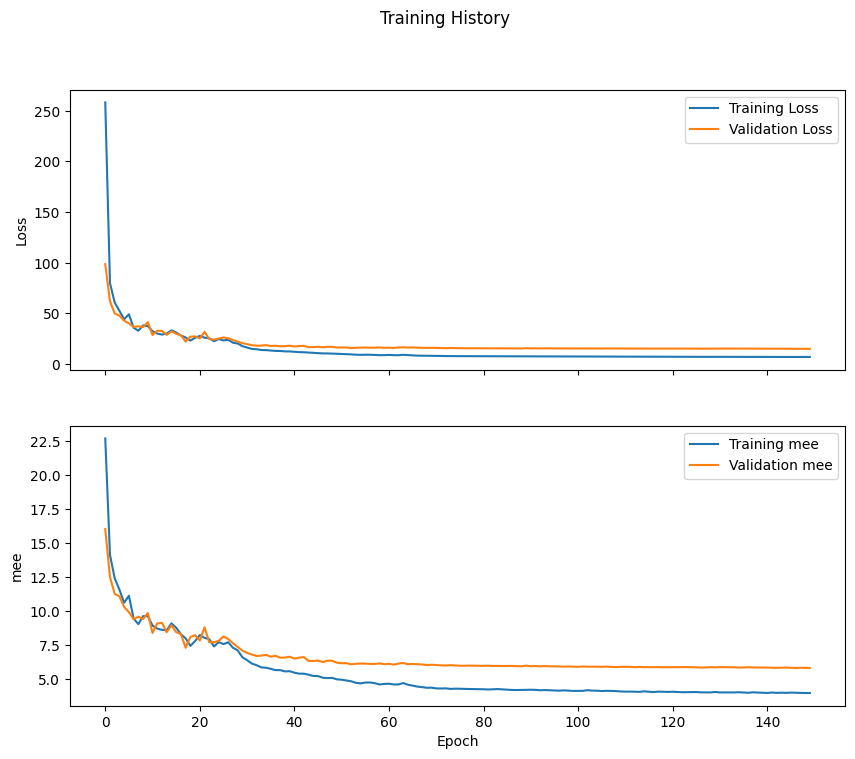

In [8]:
model_to_test = keras_mlp([
    ('dense', 150),
    ('dense', 50),
    ('dense', 25)
])

optim = k.optimizers.SGD(learning_rate=0.01, momentum=0.9, weight_decay=0.0001, nesterov=True)

hst = keras_train(model_to_test, train_data=(X_train, y_train), val_data=(X_val, y_val), epochs=150,
                  optimizer=optim, callback=callbacks)

plot_keras_history(hst)


Epoch 1/150
19/19 [==============================] - 1s 12ms/step - loss: 300.7493 - mee: 25.4086 - val_loss: 93.5566 - val_mee: 15.7385 - lr: 0.0100
Epoch 2/150
19/19 [==============================] - 0s 5ms/step - loss: 83.9745 - mee: 14.2708 - val_loss: 55.6455 - val_mee: 11.4891 - lr: 0.0100
Epoch 3/150
19/19 [==============================] - 0s 5ms/step - loss: 42.7497 - mee: 10.3092 - val_loss: 34.0729 - val_mee: 9.1091 - lr: 0.0100
Epoch 4/150
19/19 [==============================] - 0s 4ms/step - loss: 30.2828 - mee: 8.6904 - val_loss: 41.3198 - val_mee: 10.1212 - lr: 0.0100
Epoch 5/150
19/19 [==============================] - 0s 4ms/step - loss: 32.7146 - mee: 8.9065 - val_loss: 34.7664 - val_mee: 9.4570 - lr: 0.0100
Epoch 6/150
19/19 [==============================] - 0s 5ms/step - loss: 30.8530 - mee: 8.7692 - val_loss: 32.3463 - val_mee: 8.9875 - lr: 0.0100
Epoch 7/150
19/19 [==============================] - 0s 5ms/step - loss: 25.8705 - mee: 8.0202 - val_loss: 20.8642 -

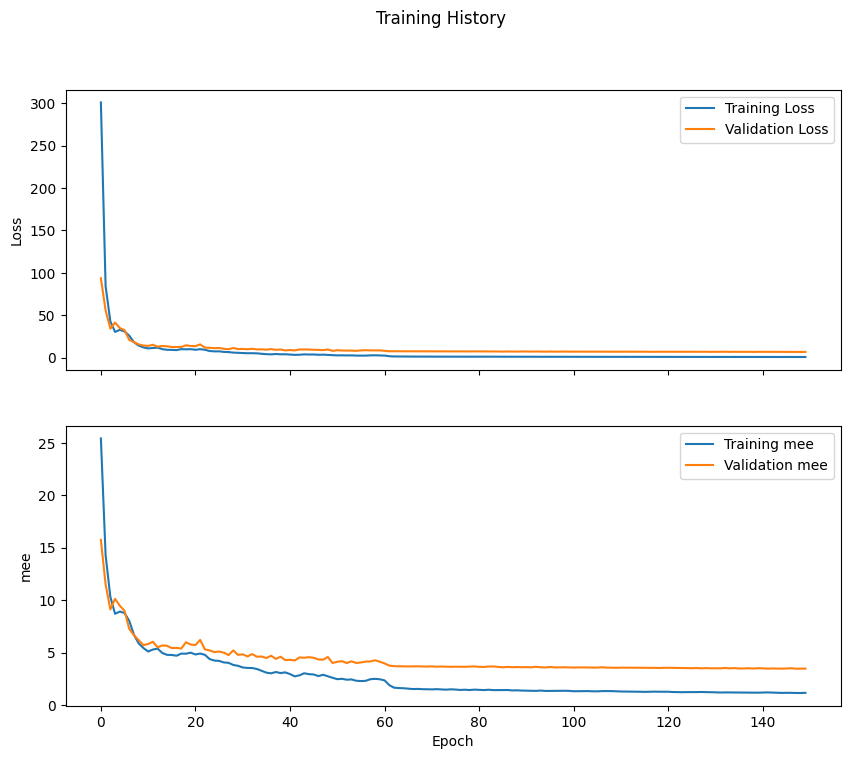

In [9]:
model_to_test = keras_mlp([
    ('dense', 25),
    ('dense', 50),
    ('dense', 150)
])
# Best parameters: {'learning_rate': 0.01, 'weight_decay': 0.0005, 'momentum': 0.9, 'nesterov': False, 'optimizer': 'SGD'}

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, cooldown=20, verbose=1,
                      factor=0.25,
                      min_lr=1e-7,
                      min_delta=1e-7)
]
optim = k.optimizers.SGD(learning_rate=0.01, momentum=0.9, weight_decay=0.0005, nesterov=False)
hst = keras_train(model_to_test, train_data=(X_train, y_train), val_data=(X_val, y_val), epochs=150,
                  optimizer=optim, callback=callbacks)
plot_keras_history(hst)

In [10]:
from tensorflow.keras.callbacks import LearningRateScheduler

model_to_test = keras_mlp([
    ('dense', 300),
    ('dense', 300),
    ('dense', 150),
    ('dense', 150)
])


def scheduler(epochs, lr):
    newlr = lr
    if epochs % 100 == 0:
        newlr = lr * 0.1
    return newlr


callbacks = [
    LearningRateScheduler(scheduler)
]

optim = k.optimizers.SGD(learning_rate=0.01, momentum=0.9, weight_decay=0.0001, nesterov=True)
hst = keras_train(model_to_test, train_data=(X_train, y_train), val_data=(X_val, y_val), epochs=150,
                  optimizer=optim, callback=callbacks)

Epoch 1/150
19/19 [==============================] - 1s 14ms/step - loss: 380.8984 - mee: 27.3018 - val_loss: 52.7538 - val_mee: 11.0879 - lr: 1.0000e-03
Epoch 2/150
19/19 [==============================] - 0s 6ms/step - loss: 38.7209 - mee: 9.6026 - val_loss: 34.6555 - val_mee: 9.1261 - lr: 1.0000e-03
Epoch 3/150
19/19 [==============================] - 0s 6ms/step - loss: 28.8486 - mee: 8.1916 - val_loss: 27.1010 - val_mee: 7.8783 - lr: 1.0000e-03
Epoch 4/150
19/19 [==============================] - 0s 6ms/step - loss: 24.9032 - mee: 7.4297 - val_loss: 24.4515 - val_mee: 7.4392 - lr: 1.0000e-03
Epoch 5/150
19/19 [==============================] - 0s 7ms/step - loss: 22.3412 - mee: 7.0002 - val_loss: 22.2024 - val_mee: 7.0181 - lr: 1.0000e-03
Epoch 6/150
19/19 [==============================] - 0s 6ms/step - loss: 20.4178 - mee: 6.6484 - val_loss: 20.0488 - val_mee: 6.6368 - lr: 1.0000e-03
Epoch 7/150
19/19 [==============================] - 0s 7ms/step - loss: 18.2362 - mee: 6.2509 -

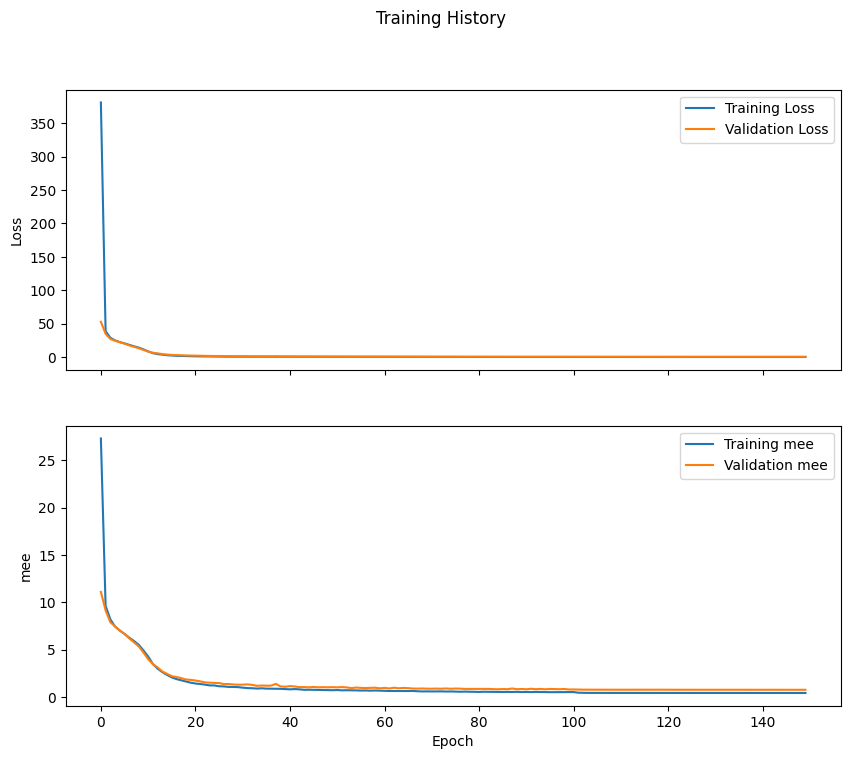

In [11]:
plot_keras_history(hst)